Loading the Airbnb dataset below:

You can download the user_training_dataset_update.csv from the link below:

https://drive.google.com/open?id=1tQGlNvkmGVPGcmQID2NNd5p8bkLBxofM

In [299]:
user_training_dataset_update=pd.read_csv("C:/Users/yuka.abe/Desktop/Airbnb Kaggle DataSet/user_training_dataset_update.csv")

In [300]:
user_training_dataset_update_binary_classfication=user_training_dataset_update.copy()
user_training_dataset_update_binary_classfication.loc[user_training_dataset_update_binary_classfication['first_browser']=='-unknown-', 'first_browser']='Unknown'
user_training_dataset_update_binary_classfication.loc[user_training_dataset_update_binary_classfication['gender']=='-unknown-', 'gender']='Unknown'



In [301]:
del user_training_dataset_update_binary_classfication['country_destination']
del user_training_dataset_update_binary_classfication['Account_creation_before_booking_flag']

In [226]:
user_training_dataset_update_binary_classfication.columns

Index(['id', 'gender', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser', 'age_computed',
       'Total time spent (in seconds)',
       'number_of_active_day_as_of_latest_date',
       'number_of_days_since_account_creation_as_of_latest_date',
       'session count', 'trip_booking_flag'],
      dtype='object')

In [228]:
Categorical_variable_list=['signup_flow','signup_method', 'gender','language', 'affiliate_channel' , 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']

In [310]:
user_training_dataset_update_binary_classfication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 17 columns):
id                                                         213451 non-null object
gender                                                     213451 non-null object
signup_method                                              213451 non-null object
signup_flow                                                213451 non-null int64
language                                                   213451 non-null object
affiliate_channel                                          213451 non-null object
affiliate_provider                                         213451 non-null object
first_affiliate_tracked                                    207386 non-null object
signup_app                                                 213451 non-null object
first_device_type                                          213451 non-null object
first_browser                                              213451 non-

Define function to get dummy variables from all the categorical variables:

In [303]:
def func_get_dummy_variables_for_categorical_variables(dataset, variable_name):
    
    dummy_variables_series=pd.get_dummies(dataset[variable_name])
    dummy_variables_series_df=pd.DataFrame(dummy_variables_series)
    
    for column in dummy_variables_series_df.columns:
        new_column_name=variable_name+'_'+str(column)
        if new_column_name in dataset.columns:
            del dataset[new_column_name]
        
        dummy_variables_series_df=dummy_variables_series_df.rename(columns={column: new_column_name})
        
        
    del dataset[variable_name]
    #del dummy_variables_series_df[dummy_variables_series_df.columns[-1]]
    return dummy_variables_series_df

Create all the dummy variables from the categorical variables:

In [304]:
user_training_dataset_update_binary_classfication1=user_training_dataset_update_binary_classfication.copy()
for variable_name in Categorical_variable_list:
    df_dummy=func_get_dummy_variables_for_categorical_variables(user_training_dataset_update_binary_classfication1, variable_name)
    user_training_dataset_update_binary_classfication1=user_training_dataset_update_binary_classfication1.merge(df_dummy, on=None, left_index=True, right_index=True)

Drop all the rows with na value for for now:

In [375]:
user_training_dataset_update_binary_classfication_dropna=user_training_dataset_update_binary_classfication1.dropna(how='any')

Define the feature list:

In [373]:
feature_list=list(user_training_dataset_update_binary_classfication1.columns)
feature_list.remove('id')
feature_list.remove('trip_booking_flag')

Define the label and feature:

In [374]:
y,X=user_training_dataset_update_binary_classfication_dropna.trip_booking_flag, user_training_dataset_update_binary_classfication_dropna[feature_list]

Frist model: Develop binary classification model. Use trip_booking_flag as the label and rest of the variables as features


Use Logistic Regression to fit the model:

In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns

In [323]:
model_logistic_regression_binary_clf=LogisticRegression().fit(X,y)
cross_val_score(model_logistic_regression_binary_clf, X,y, cv=5).mean()

0.5461062881330374

Model Performance:

In [324]:
cross_val_score(model_logistic_regression_binary_clf, X,y, cv=5, scoring='precision').mean()

0.5461062881330374

In [325]:
cross_val_score(model_logistic_regression_binary_clf, X,y, cv=5, scoring='recall').mean()

1.0

In [326]:
cross_val_score(model_logistic_regression_binary_clf, X,y, cv=5, scoring='f1').mean()

0.7064278722509444

In [356]:
cross_val_score(model_logistic_regression_binary_clf, X, y, cv=5, scoring='roc_auc').mean()

0.5946564948593601

Model Prediction:

In [331]:
model_logistic_regression_binary_clf.predict(X)

array([ True,  True,  True, ...,  True,  True,  True])

In [339]:
prediction_logistic_regression=pd.Series(model_logistic_regression_binary_clf.predict(X))

The model prediction outcome only has one single result: True:

In [340]:
prediction_logistic_regression.unique()

array([ True])

In [348]:
prediction_probability_logistic_regression=list(zip(*model_logistic_regression_binary_clf.predict_proba(X)))[1]

Below is the distribution of the prediction probability:

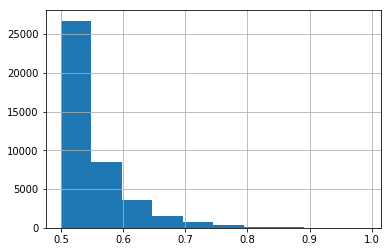

In [355]:
pd.Series(list(prediction_probability_logistic_regression)).hist()

Logistic Regression Coefficient:

In [368]:
logistic_regression_coefficient_df=pd.DataFrame(list(zip(feature_list, model_logistic_regression_binary_clf.coef_[0])), columns=['feature_name', 'beta'])

In [367]:
logistic_regression_coefficient_df.head()

,feature_name,beta
0,age_computed,7.732413e-13
1,Total time spent (in seconds),1.191455e-07
2,number_of_active_day_as_of_latest_date,1.056409e-11
3,number_of_days_since_account_creation_as_of_la...,1.056409e-11
4,session count,3.842446e-12


Sort beta to get important coefficients:

In [371]:
logistic_regression_coefficient_df.sort_values(by='beta', ascending=False).head(10)

,feature_name,beta
1,Total time spent (in seconds),1.191455e-07
2,number_of_active_day_as_of_latest_date,1.056409e-11
3,number_of_days_since_account_creation_as_of_la...,1.056409e-11
4,session count,3.842446e-12
0,age_computed,7.732413e-13
22,signup_method_basic,1.347683e-13
89,signup_app_Web,5.781160e-14
5,signup_flow_0,5.432626e-14
28,gender_Unknown,4.670967e-14
94,first_device_type_Mac Desktop,4.202747e-14


Use Decision Tree to fit the model:

In [372]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [376]:
model_decision_tree_binary_clf=DecisionTreeClassifier().fit(X,y)
cross_val_score(model_decision_tree_binary_clf, X, y, cv=5).mean()

0.5476929124431907

In [377]:
cross_val_score(model_logistic_regression_binary_clf, X,y, cv=5, scoring='precision').mean()

0.5461062881330374

In [378]:
cross_val_score(model_logistic_regression_binary_clf, X, y, cv=5, scoring='roc_auc').mean()

0.5946564948593601